# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis of WeatherPy:

   The data shows a correlation between latitude and max temperatures for cities in northern and southern hemispheres.  There is a negative linear regression for northern hemisphere cities. This is expected since the further from latitude 0, the equator, the colder the temperature gets.  There is a positive linear regression for southern hempisphere cities.  Around latitude 0, the equator, there are max temperatures.  This is expected since the closer to the equator, the warmer the weather due to distance from the sun.
  
  There is no correlation between humidity vs latitude data.  The data is very spread out, indiciating distance from latitude 0, the equator, does not have an association with humidity.  This is also seen in cloudiness and wind speed vs latitude data, there is no correlation.
  
  It is noteworthy to mention the total cities in the northern vs southern hemisphere is not equally distributed. There were 375 cities in the norhtern hemisphere, while only 178 cities in the southern hemisphere.This uneven distriubtion can skew data trends, such as the the negative and positive linear regression trends observed in temperature vs latitude.Stronger relationships may be seen in the northern hemisphere cities due to a larger data set than the southern hempisphere cities.

    

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [139]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [140]:
# Weather check using api cells
#empty array to store data
city_name = []
latitude = []
longitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#loop through multiple cities
counter = 0
set_counter = 1         
next_counter = 0
skip_counter  = 0


#url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url_base = f"{url}appid={weather_api_key}&units={units}&q="

#Loop
for city in cities:
     #query w. url
    url_city = url_base + city
    test_response = requests.get(url_city)
    response = test_response.json()
    
    try:
        # Pause for 20 seconds every 50 records processed
        if counter > 49: 
            counter = 0
            set_counter +=1
            time.sleep(20) 
            
        city_name.append(response['name'])    
        latitude.append(response['coord']['lat'])
        longitude.append (response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])  
        cloudiness.append(response['clouds']['all'])  
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])   
        date.append(response['dt'])
        
        print (f"Processing {counter} of Set {set_counter} | {city}")
        
        # Accumulate the processed counters
        counter += 1
        next_counter += 1
        
    except (KeyError, IndexError):
        
        # Skip city without API data
        print (f"City {city} not found. Skipping...")
        skip_counter   += 1
        
#Indictae code is done & inform data found        
print ("===================================================================================")        
print (f"Number of Citites Analyzed: {next_counter}")
print (f"Number of Cities Skipped: {skip_counter}")

City kamenskoye not found. Skipping...
Processing 0 of Set 1 | nikolskoye
Processing 1 of Set 1 | mahebourg
Processing 2 of Set 1 | avarua
Processing 3 of Set 1 | ayia galini
Processing 4 of Set 1 | coruripe
Processing 5 of Set 1 | toora-khem
Processing 6 of Set 1 | petropavlovsk-kamchatskiy
Processing 7 of Set 1 | northam
Processing 8 of Set 1 | punta arenas
Processing 9 of Set 1 | anekal
Processing 10 of Set 1 | shalinskoye
Processing 11 of Set 1 | geraldton
Processing 12 of Set 1 | tasiilaq
Processing 13 of Set 1 | hambantota
Processing 14 of Set 1 | victoria
Processing 15 of Set 1 | esperance
Processing 16 of Set 1 | komsomolskiy
Processing 17 of Set 1 | ushuaia
Processing 18 of Set 1 | barranca
Processing 19 of Set 1 | hobart
Processing 20 of Set 1 | busselton
Processing 21 of Set 1 | tiksi
Processing 22 of Set 1 | lompoc
Processing 23 of Set 1 | port alfred
Processing 24 of Set 1 | broken hill
Processing 25 of Set 1 | teknaf
City saleaula not found. Skipping...
Processing 26 of S

Processing 18 of Set 5 | abancay
Processing 19 of Set 5 | ucluelet
Processing 20 of Set 5 | tautira
Processing 21 of Set 5 | mosquera
Processing 22 of Set 5 | isla vista
City marcona not found. Skipping...
Processing 23 of Set 5 | eydhafushi
Processing 24 of Set 5 | san jose
Processing 25 of Set 5 | birao
Processing 26 of Set 5 | fort morgan
Processing 27 of Set 5 | sao joao da barra
Processing 28 of Set 5 | ciudad bolivar
Processing 29 of Set 5 | belyy yar
Processing 30 of Set 5 | laguna
City dzhusaly not found. Skipping...
City tuggurt not found. Skipping...
Processing 31 of Set 5 | north platte
City amderma not found. Skipping...
Processing 32 of Set 5 | jumla
Processing 33 of Set 5 | kitami
Processing 34 of Set 5 | safranbolu
Processing 35 of Set 5 | saint-pierre
Processing 36 of Set 5 | toropets
Processing 37 of Set 5 | roebourne
Processing 38 of Set 5 | bonito
Processing 39 of Set 5 | saint anthony
Processing 40 of Set 5 | ushtobe
Processing 41 of Set 5 | sao miguel do araguaia
P

Processing 39 of Set 9 | novoagansk
Processing 40 of Set 9 | taltal
Processing 41 of Set 9 | xuddur
Processing 42 of Set 9 | warman
Processing 43 of Set 9 | waddan
Processing 44 of Set 9 | alta
Processing 45 of Set 9 | magistralnyy
Processing 46 of Set 9 | whitehorse
Processing 47 of Set 9 | kavaratti
Processing 48 of Set 9 | ust-nera
Processing 49 of Set 9 | pena blanca
Processing 0 of Set 10 | oyama
Processing 1 of Set 10 | kenora
Processing 2 of Set 10 | yumen
Processing 3 of Set 10 | katsuura
Processing 4 of Set 10 | ajaccio
City rawannawi not found. Skipping...
Processing 5 of Set 10 | norrtalje
Processing 6 of Set 10 | totness
Processing 7 of Set 10 | muzhi
Processing 8 of Set 10 | dergachi
Processing 9 of Set 10 | kimbe
Processing 10 of Set 10 | katherine
Processing 11 of Set 10 | ilo
Processing 12 of Set 10 | itoman
Processing 13 of Set 10 | oriximina
City formoso do araguaia not found. Skipping...
Processing 14 of Set 10 | pinyug
Processing 15 of Set 10 | hofn
Processing 16 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [186]:
#Create DF
city_info = pd.DataFrame({ "City": city_name
                       , "Latitude"   : latitude
                       , "Longitude"  : longitude
                       , "Temperature" : temp
                       , "Humidity"        : humidity
                       , "Cloudiness"  : cloudiness
                       , "Wind speed"      : wind_speed
                       , "Country"    : country
                       , "Date"   : date})

city_info.index.name = "City_ID"

#Export to .csv 
output_data_file = "../output_data/cities.csv"
output_path = os.path.join(output_data_file )
city_info.to_csv(output_path,index="False")
city_info

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind speed,Country,Date
City_ID,,,,,,,,,
0,Nikolskoye,59.7035,30.7861,64.87,99,100,9.42,RU,2022-08-02
1,Mahébourg,-20.4081,57.7000,66.49,94,40,6.91,MU,2022-08-02
2,Avarua,-21.2078,-159.7750,78.85,57,75,14.97,CK,2022-08-02
3,Agía Galíni,35.1000,24.6833,79.39,57,0,8.55,GR,2022-08-02
4,Coruripe,-10.1256,-36.1756,71.37,77,21,7.63,BR,2022-08-02
...,...,...,...,...,...,...,...,...,...
548,Guerrero Negro,27.9769,-114.0611,78.57,55,0,15.84,MX,2022-08-02
549,Karatuzskoye,53.6072,92.8667,62.83,91,68,4.23,RU,2022-08-02
550,Raja,8.4596,25.6780,66.63,94,99,3.60,SS,2022-08-02


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [187]:
#Find cities > 100% Humidity
city_humidities = len(city_info[(city_info["Humidity"] > 100) ])

if city_humidities  > 0:
    print (f"city_humidities: {city_humidities}")

#Select only cities with humidity less than or equal to 100
clean_city_data = city_info.loc[ (city_info["Humidity"] <= 100 ) , :]
len(clean_city_data)

#Cities with humidity >100 --> there are none
#humid_data = city_info.loc[ (city_info["Humidity"] >= 100 ) , :]
#len(humid_data)

553

In [188]:
#View data-easier for plotting
clean_city_data

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind speed,Country,Date
City_ID,,,,,,,,,
0,Nikolskoye,59.7035,30.7861,64.87,99,100,9.42,RU,2022-08-02
1,Mahébourg,-20.4081,57.7000,66.49,94,40,6.91,MU,2022-08-02
2,Avarua,-21.2078,-159.7750,78.85,57,75,14.97,CK,2022-08-02
3,Agía Galíni,35.1000,24.6833,79.39,57,0,8.55,GR,2022-08-02
4,Coruripe,-10.1256,-36.1756,71.37,77,21,7.63,BR,2022-08-02
...,...,...,...,...,...,...,...,...,...
548,Guerrero Negro,27.9769,-114.0611,78.57,55,0,15.84,MX,2022-08-02
549,Karatuzskoye,53.6072,92.8667,62.83,91,68,4.23,RU,2022-08-02
550,Raja,8.4596,25.6780,66.63,94,99,3.60,SS,2022-08-02


In [193]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Specific Date

from datetime import date as dt

#date = pd.to_datetime(clean_city_data["Date"], units ='s').dt.date
date = pd.to_datetime(clean_city_data["Date"]).dt.date
specific_date = date[0:1]

for item in specific_date:
    date_analysis = str(item)

date_analysis

'2022-08-02'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [194]:
#Function to plot scatter plot-doing this repeatedly in this hw, func easier than repetitive code.
def scatter_plot(params):
    
    # Save the y_axis value
    y_axis  = params.get("y_axis")
    y_label  = params.get("y_label")
    unit    = params.get("unit")
    outfile = params.get("outfile")
    
    x_axis = clean_city_data["Latitude"]
    
    plt.scatter(x_axis, y_axis, marker="^")
                
    x_label = "Latitude"

    plt.title(f"{x_label} vs. {y_label} ({date_analysis})")
    plt.ylabel(f"{y_label} {unit}")
    plt.xlabel(f"{x_label}")
    plt.grid()

    #Output
    plt.savefig(f"../output_data/{outfile}")
    plt.show()

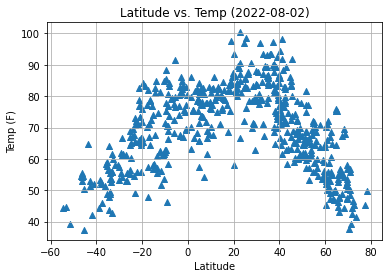

In [195]:
#Lat vs.Temp
params =  { "y_axis": clean_city_data["Temperature"],
            "y_label": "Temp",
            "unit": "(F)",
            "outfile": "fig1_Latitude_vs_Temp.png"}

scatter_plot(params)

This plot shows a correlation between the latitude and temperature for cities with humidity less than/ equal to 100. The highest temperatures are countries with latitude around 0, while latitudes furthest away from 0, such as -60 and 80, have low temperatures.  This indicates low temperature correlates to the further from the equator/ latitude 0 you get, while higher temperatures correlate to regions around latitude 0.

## Latitude vs. Humidity Plot

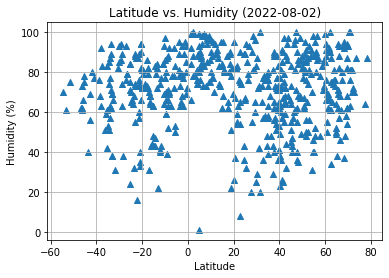

In [196]:
# Lat vs Humidity
params =  { "y_axis": clean_city_data["Humidity"],
            "y_label": "Humidity",
            "unit": "(%)",
            "outfile": "fig2_Latitude_vs_Humidity.png"}
scatter_plot(params)

This plot shows the correlation between the latitude and humidity for cities with humidity less than/ equal to 100. Overall, the majority of data points appear to accumulate in the 60-100% humidity range. However, there is no overall correlation in this plot.

## Latitude vs. Cloudiness Plot

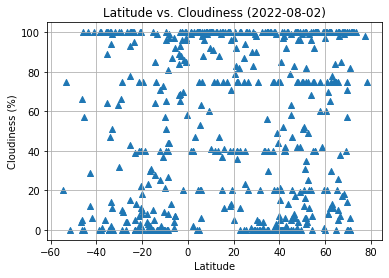

In [197]:
#Lat vs Clouds
params =  { "y_axis": clean_city_data["Cloudiness"],
            "y_label": "Cloudiness",
            "unit": "(%)",
            "outfile": "fig3_Latitude_vs_Cloudiness.png"}
scatter_plot(params)

This plot shows the correlation between the latitude and cloudiness for cities with humidity less than/ equal to 100. Overall, the data is very spread out.  Therefore, there is no correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

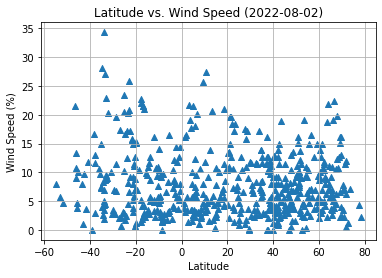

In [198]:
#Lat vs Wind Speed
params =  { "y_axis": clean_city_data["Wind speed"],
            "y_label": "Wind Speed",
            "unit": "(%)",
            "outfile": "fig4_Latitude_vs_Wind_Speed.png"}
scatter_plot(params)

This plot shows the correlation between the latitude and ind speed for cities with humidity less than/ equal to 100. Overall, the data points are accumulated towards lower wind speeds. However, the plot does not show a correlation between wind speed and latitude.

## Linear Regression

In [199]:
#North DF
north_info= clean_city_data.loc[(clean_city_data["Latitude"] >= 0 )]
                                            
#South DF
south_info = clean_city_data.loc[(clean_city_data["Latitude"] < 0 )]
                                            
print (f"Number of cities in the Northern Hemisphere: {len(north_info)}")
print (f"Number of cities in Southern Hemisphere: {len(south_info)}")

Number of cities in the Northern Hemisphere: 375
Number of cities in Southern Hemisphere: 178


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [200]:
#Func-repetitive code, easier to call func to do work that will be repeated
def linear_regression_calc(calc_params):
    
    # Save the parms value from parms dict
    hemisphere_loc =  calc_params.get("hemisphere_loc")
    x_values =  calc_params.get("x_values")
    y_values =  calc_params.get("y_values")
    y_label =  calc_params.get("y_label")
    x_label =  calc_params.get("x_label")
    unit  =  calc_params.get("unit")
    x  =  calc_params.get("x")  
    y = calc_params.get("y") 
    outfile  = calc_params.get("outfile")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    # Create line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Plot
    plt.scatter( x_values, y_values, color = "blue")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=10,color="red")
    x_label = "Latitude"
    plt.xlabel (f"{x_label}")
    plt.ylabel (f"{y_label} {unit}")
    plt.title  (f"{hemisphere_loc} Hemisphere - {y_label} {unit} vs. {x_label} ({date_analysis})")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    #Output 
    plt.savefig(f"../output_data/{outfile}")
    plt.show()

In [212]:
#view data-easier for plotting
#len(north_info) #375 cities
len(south_info) #178 cities

178

The r-value is: 0.4055025292864515


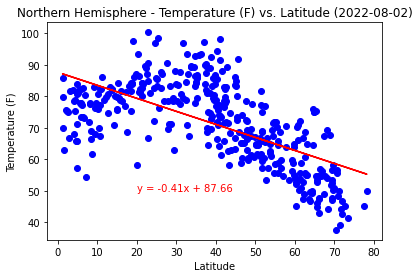

In [202]:
#North Hemi Temp vs. Latitude
calc_params = {"hemisphere_loc": "Northern",
               "x_values": north_info["Latitude"],
               "y_values": north_info["Temperature"],
               "y_label": "Temperature",
               "unit": "(F)",
               "x": 20,
               "y": 50,
               "outfile": "fig5_Northern_Temp_vs_Latitude.png"}

linear_regression_calc(calc_params)

This plot shows the correlation between latitude and temperature for the northern hemisphere.  There is a negative linear regression between latitude and temperature since temperature decreases (gets colder) the further from latitude 0.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5121227017381583


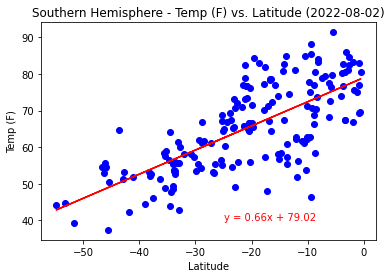

In [203]:
#South Hemi Temp vs. Latitude
calc_params = {"hemisphere_loc": "Southern",
               "x_values": south_info["Latitude"],
               "y_values": south_info["Temperature"],
               "y_label": "Temp",
               "unit": "(F)",
               "x": -25,
               "y": 40,
               "outfile": "fig6_Southern_Temp_vs_Latitude.png"}

linear_regression_calc(calc_params)

This plot analyzes the correlation between the latitude and temperature for the southern hemisphere. The plot shows a positive linear regression between the latitude and temperature since temperature increases (gets hotter) as the data gets closer to latitude 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.013872385683337561


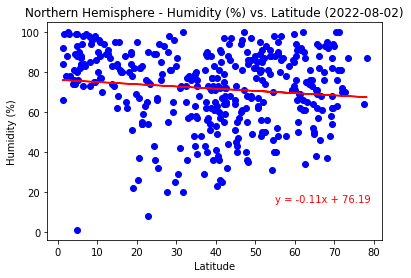

In [204]:
#North Hemi Humidity vs. Latitude
calc_params = {"hemisphere_loc": "Northern",
               "x_values": north_info["Latitude"],
               "y_values": north_info["Humidity"],
               "y_label": "Humidity",
               "unit": "(%)",
               "x": 55,
               "y": 15,
               "outfile": "fig7_Northern_Humidity_vs_Latitude.png"}

linear_regression_calc(calc_params)

This plot shows the correlation between latitude and humidity for the nothern hemisphere.  There is no correlation since the linear regression is flat. The data points are accumulated in higer humidity ranges, but overall there is no correlation between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.012677229638429663


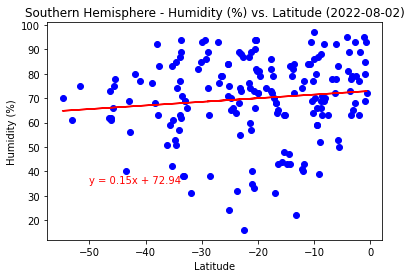

In [205]:
#South Hemi Humidity vs. Latitude
calc_params = {"hemisphere_loc": "Southern",
               "x_values": south_info["Latitude"],
               "y_values": south_info["Humidity"],
               "y_label": "Humidity",
               "unit": "(%)",
               "x": -50,
               "y": 35,
               "outfile": "fig8_Southern_Humidity_vs_Latitude.png"}

linear_regression_calc(calc_params)

This plot shows the correlation between latitude and humidity for the southern hemisphere. There is no correlation since the linear regression is flat. The data points are spread out, and overall there is no correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003863419483450729


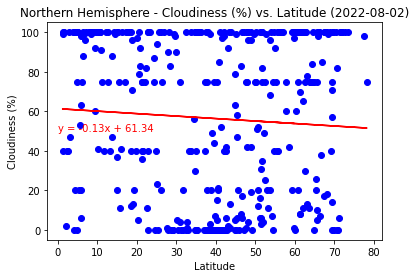

In [206]:
#North Hemi Cloudiness vs. Latitude
calc_params = {"hemisphere_loc": "Northern",
               "x_values": north_info["Latitude"],
               "y_values": north_info["Cloudiness"],
               "y_label": "Cloudiness",
               "unit": "(%)",
               "x": 0,
               "y": 50,
               "outfile": "fig9_Northern_Cloudiness_vs_Latitude.png"}

linear_regression_calc(calc_params)

This plot analyzes the correlation between the latitude and cloudiness for the northern hemisphere. The linear regression is flat, indiciating no correlation. The data is scattered across a broad range.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.014405356783826574


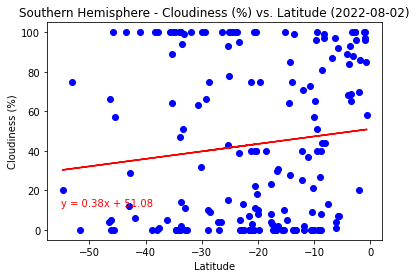

In [207]:
#South Hemi Cloudiness vs. Latitude
calc_params = {"hemisphere_loc": "Southern",
               "x_values": south_info["Latitude"],
               "y_values": south_info["Cloudiness"],
               "y_label": "Cloudiness",
               "unit": "(%)",
               "x": -55,
               "y": 12,
               "outfile": "fig10_Southern_Cloudiness_vs_Latitude.png"}

linear_regression_calc(calc_params)

This plot analyzes the correlation between the latitude and cloudiness for southern hemisphere. There is a slightly positive linear regression between cloudiness and latitude, but overall there is no correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00048688386406815304


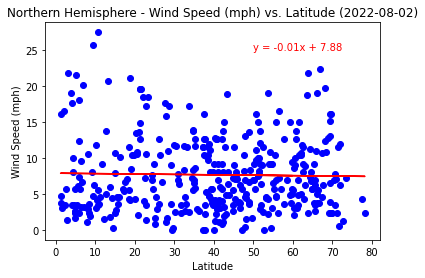

In [208]:
#North Hemi Wind Speed vs. Latitude
calc_params = {"hemisphere_loc": "Northern",
               "x_values": north_info["Latitude"],
               "y_values": north_info["Wind speed"],
               "y_label": "Wind Speed",
               "unit": "(mph)",
               "x": 50,
               "y": 25,
               "outfile": "fig11_Northern_Wind_Speed_vs_Latitude.png"}

linear_regression_calc(calc_params)

This plot shows the correlation between the latitude and wind speed for the northern hemisphere.  The data is spread out with a flat linear regression line, indicating no correlation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.023365543403734715


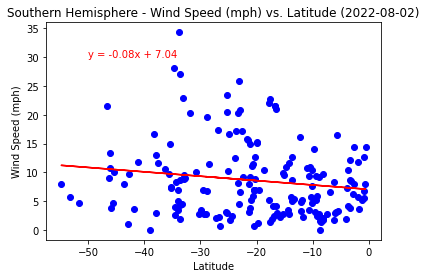

In [209]:
#South Hemi Wind Speed vs. Latitude
calc_params = {"hemisphere_loc": "Southern",
               "x_values": south_info["Latitude"],
               "y_values": south_info["Wind speed"],
               "y_label": "Wind Speed",
               "unit": "(mph)",
               "x": -50,
               "y": 30,
               "outfile": "fig12_Southern_Wind_Speed_vs_Latitude.png"}

linear_regression_calc(calc_params)

This plot analyzes the correlation between the latitude and wind speed for the southern hemisphere. Data is spread out, with a slightly negative linear regression line between latitude and wind speed.  This indicates there is no correlation.